## Singular Value Decomposition (SVD)

example of one of a number of methods of decomposing a matrix into the product of other (often simpler) matrices

#### case where X is n x m, where n = m (X is square matrix)

In [2]:
# we'll start by just generating a matrix of random numbers
# we'll talk about random numbers a lot more later

import numpy as np
import numpy.random as R

# case of n = m
n = 5
m = 5

# generate an nxm matrix
X = R.rand(n, m)

# SVD
(U, S, Vt) = np.linalg.svd(X)
print('U  is', U.shape, '\nS  is', S.shape, '\nVt is', Vt.shape)

# note the shape of S (just showing diagonals), turn into a matrix
S = np.diag(S)
print('\nS is now', S.shape)

U  is (5, 5) 
S  is (5,) 
Vt is (5, 5)

S is now (5, 5)


In [3]:
# compare A and U@S@Vt
Y = U@S@Vt
print('X = ', X)
print('Y = ', Y)
print()
print(np.sum(np.sum(X - Y)))

X =  [[0.13083207 0.03441457 0.98638449 0.56104694 0.87168475]
 [0.16998101 0.28023893 0.37328136 0.50352833 0.22273994]
 [0.43183964 0.39802263 0.71772956 0.4535964  0.60231557]
 [0.33467136 0.22740877 0.40883046 0.54548519 0.18014623]
 [0.48228371 0.68800074 0.48934371 0.18598143 0.30732262]]
Y =  [[0.13083207 0.03441457 0.98638449 0.56104694 0.87168475]
 [0.16998101 0.28023893 0.37328136 0.50352833 0.22273994]
 [0.43183964 0.39802263 0.71772956 0.4535964  0.60231557]
 [0.33467136 0.22740877 0.40883046 0.54548519 0.18014623]
 [0.48228371 0.68800074 0.48934371 0.18598143 0.30732262]]

-5.953570969552402e-15


#### case where X is n x m, where n > m (X is tall and skinny)

In [4]:
# now consider n > m
n = 8
m = 5

# generate an nxm matrix
X = R.rand(n, m)

# SVD
(U, S, Vt) = np.linalg.svd(X)
S = np.diag(S)

print('U  is', U.shape, '\nS  is', S.shape, '\nVt is', Vt.shape)

U  is (8, 8) 
S  is (5, 5) 
Vt is (5, 5)


In [5]:
# recall from slides that with n > m, we have rows of zeros in S
# it should be nxm, but here it's only mxm (with n > m)

# cannot simply multiple components together

Y = U@S@Vt

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 8)

In [6]:
# could add rows of zeros to S

S = np.concatenate((S, np.zeros((X.shape[0]-S.shape[0], S.shape[1]))))
print(S)
print('U  is', U.shape, '\nS  is', S.shape, '\nVt is', Vt.shape)

[[3.33841497 0.         0.         0.         0.        ]
 [0.         1.05518786 0.         0.         0.        ]
 [0.         0.         0.75330225 0.         0.        ]
 [0.         0.         0.         0.56426176 0.        ]
 [0.         0.         0.         0.         0.42200052]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
U  is (8, 8) 
S  is (8, 5) 
Vt is (5, 5)


In [7]:
Y = U@S@Vt
print('A = ', X)
print('B = ', Y)
print()
print(np.sum(np.sum(X - Y)))

A =  [[0.24371624 0.48912418 0.09538199 0.96479865 0.8854921 ]
 [0.44370957 0.78416531 0.77246259 0.63666919 0.99154486]
 [0.25585281 0.80038236 0.086696   0.33476093 0.70720497]
 [0.58388101 0.49069235 0.61079759 0.88588561 0.04849694]
 [0.47560707 0.67050109 0.33513941 0.12071381 0.35934512]
 [0.58674463 0.36061546 0.36675991 0.56799027 0.42613972]
 [0.78986963 0.46580326 0.65274825 0.50064271 0.63323471]
 [0.11951832 0.21946206 0.91481428 0.73460849 0.18058609]]
B =  [[0.24371624 0.48912418 0.09538199 0.96479865 0.8854921 ]
 [0.44370957 0.78416531 0.77246259 0.63666919 0.99154486]
 [0.25585281 0.80038236 0.086696   0.33476093 0.70720497]
 [0.58388101 0.49069235 0.61079759 0.88588561 0.04849694]
 [0.47560707 0.67050109 0.33513941 0.12071381 0.35934512]
 [0.58674463 0.36061546 0.36675991 0.56799027 0.42613972]
 [0.78986963 0.46580326 0.65274825 0.50064271 0.63323471]
 [0.11951832 0.21946206 0.91481428 0.73460849 0.18058609]]

1.915134717478395e-15


In [8]:
# can also use this option, which returns matrices sized to allow multiplication

(U, S, Vt) = np.linalg.svd(X, full_matrices=False)
S = np.diag(S)
print('U  is', U.shape, '\nS  is', S.shape, '\nVt is', Vt.shape)

# it ignores the parts of U that would be zero when multiplied by 0s in S

U  is (8, 5) 
S  is (5, 5) 
Vt is (5, 5)


In [9]:
Y = U@S@Vt
print('X = ', X)
print('Y = ', Y)
print()
print(np.sum(np.sum(X - Y)))

X =  [[0.24371624 0.48912418 0.09538199 0.96479865 0.8854921 ]
 [0.44370957 0.78416531 0.77246259 0.63666919 0.99154486]
 [0.25585281 0.80038236 0.086696   0.33476093 0.70720497]
 [0.58388101 0.49069235 0.61079759 0.88588561 0.04849694]
 [0.47560707 0.67050109 0.33513941 0.12071381 0.35934512]
 [0.58674463 0.36061546 0.36675991 0.56799027 0.42613972]
 [0.78986963 0.46580326 0.65274825 0.50064271 0.63323471]
 [0.11951832 0.21946206 0.91481428 0.73460849 0.18058609]]
Y =  [[0.24371624 0.48912418 0.09538199 0.96479865 0.8854921 ]
 [0.44370957 0.78416531 0.77246259 0.63666919 0.99154486]
 [0.25585281 0.80038236 0.086696   0.33476093 0.70720497]
 [0.58388101 0.49069235 0.61079759 0.88588561 0.04849694]
 [0.47560707 0.67050109 0.33513941 0.12071381 0.35934512]
 [0.58674463 0.36061546 0.36675991 0.56799027 0.42613972]
 [0.78986963 0.46580326 0.65274825 0.50064271 0.63323471]
 [0.11951832 0.21946206 0.91481428 0.73460849 0.18058609]]

1.915134717478395e-15


In [10]:
# now consider n < m (X is short and fat)
n = 5
m = 8

# generate an nxm matrix
X = R.rand(n, m)

# SVD
(U, S, Vt) = np.linalg.svd(X)
S = np.diag(S)

print('U  is', U.shape, '\nS  is', S.shape, '\nVt is', Vt.shape)

U  is (5, 5) 
S  is (5, 5) 
Vt is (8, 8)


In [11]:
# recall from slides that with n < m, we have cols of zeros in S
# it should be nxm, but here it's only mxm (with n < m)

# cannot simply multiple components together

Y = U@S@Vt

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 8 is different from 5)

In [12]:
# can also use this option, which returns matrices sized to allow multiplication

(U, S, Vt) = np.linalg.svd(X, full_matrices=False)
S = np.diag(S)
print('U  is', U.shape, '\nS  is', S.shape, '\nVt is', Vt.shape)

# it ignores the parts of V that would be zero when multiplied by 0s in S

U  is (5, 5) 
S  is (5, 5) 
Vt is (5, 8)


In [13]:
Y = U@S@Vt
print('X = ', X)
print('Y = ', Y)
print()
print(np.sum(np.sum(X - Y)))

X =  [[8.80659650e-01 8.93252886e-01 4.69668537e-02 2.55824117e-01
  8.58219715e-01 7.56524346e-01 2.58765749e-01 2.07005936e-01]
 [7.13640134e-01 7.19932015e-01 1.50593093e-01 9.60820544e-01
  8.20776703e-01 7.63794849e-01 4.19769856e-03 6.55857692e-01]
 [5.71731860e-01 7.24149127e-01 2.11090062e-01 5.17233326e-01
  2.34933074e-01 1.18102624e-01 4.04677317e-01 9.97582385e-01]
 [4.00375464e-04 2.68759438e-01 8.72142564e-01 8.47768377e-02
  2.92475634e-01 6.90096501e-02 9.50216338e-01 8.10909937e-01]
 [4.23991799e-01 3.22347175e-01 2.23045195e-01 9.44630165e-01
  7.78176223e-01 4.26965281e-01 1.43794617e-01 8.42785205e-01]]
Y =  [[8.80659650e-01 8.93252886e-01 4.69668537e-02 2.55824117e-01
  8.58219715e-01 7.56524346e-01 2.58765749e-01 2.07005936e-01]
 [7.13640134e-01 7.19932015e-01 1.50593093e-01 9.60820544e-01
  8.20776703e-01 7.63794849e-01 4.19769856e-03 6.55857692e-01]
 [5.71731860e-01 7.24149127e-01 2.11090062e-01 5.17233326e-01
  2.34933074e-01 1.18102624e-01 4.04677317e-01 9.975

#### some nice properties of SVD

In [14]:
n = 8
m = 5

# generate an nxm matrix
X = R.rand(n, m)

# SVD
(U, S, Vt) = np.linalg.svd(X)
S = np.diag(S)

print('U  is', U.shape, '\nS  is', S.shape, '\nVt is', Vt.shape)

U  is (8, 8) 
S  is (5, 5) 
Vt is (5, 5)


In [15]:
# remember that the transpose of a matrix just makes the rows columns

print(U)
print()
print(U.T)

[[-0.38645674  0.33800746  0.2633842  -0.13744263  0.04788669 -0.66361039
  -0.373187    0.25729363]
 [-0.57359905  0.2476218  -0.34668194  0.42762523 -0.10382672  0.05345853
  -0.06293042 -0.53760378]
 [-0.26303505  0.11217764  0.75109078  0.28624918 -0.13986566  0.21423631
   0.44899167  0.07141199]
 [-0.44570165 -0.57236606  0.21145003 -0.38054355  0.42410382  0.10856639
  -0.10339427 -0.28614952]
 [-0.33084989 -0.57969929 -0.25626761  0.2015804  -0.43607898 -0.16441941
   0.11977114  0.46544129]
 [-0.1999215   0.19740512  0.03225302 -0.4647441  -0.52653154  0.53358351
  -0.36032809  0.11068929]
 [-0.15848788  0.20803634 -0.23875206 -0.5579548  -0.11206298 -0.22393977
   0.69931499 -0.10741411]
 [-0.28151244  0.2568044  -0.27906277  0.05965664  0.55456468  0.37038556
   0.10613396  0.56336084]]

[[-0.38645674 -0.57359905 -0.26303505 -0.44570165 -0.33084989 -0.1999215
  -0.15848788 -0.28151244]
 [ 0.33800746  0.2476218   0.11217764 -0.57236606 -0.57969929  0.19740512
   0.20803634  0

In [16]:
# U multiple by U-transpose is just the identity matrix

print(U@U.T)

[[ 1.00000000e+00 -2.22044605e-16  4.16333634e-16 -1.80411242e-16
  -6.24500451e-17 -1.11022302e-16 -1.11022302e-16 -1.94289029e-16]
 [-2.22044605e-16  1.00000000e+00 -4.71844785e-16 -1.38777878e-17
  -5.55111512e-17 -1.11022302e-16  1.66533454e-16  3.05311332e-16]
 [ 4.16333634e-16 -4.71844785e-16  1.00000000e+00  2.28983499e-16
  -6.93889390e-18  2.67147415e-16 -2.77555756e-16 -5.27355937e-16]
 [-1.80411242e-16 -1.38777878e-17  2.28983499e-16  1.00000000e+00
  -1.38777878e-17 -2.35922393e-16 -1.52655666e-16  5.55111512e-17]
 [-6.24500451e-17 -5.55111512e-17 -6.93889390e-18 -1.38777878e-17
   1.00000000e+00  5.55111512e-17  0.00000000e+00 -5.55111512e-17]
 [-1.11022302e-16 -1.11022302e-16  2.67147415e-16 -2.35922393e-16
   5.55111512e-17  1.00000000e+00  2.42861287e-16 -1.24900090e-16]
 [-1.11022302e-16  1.66533454e-16 -2.77555756e-16 -1.52655666e-16
   0.00000000e+00  2.42861287e-16  1.00000000e+00  6.93889390e-17]
 [-1.94289029e-16  3.05311332e-16 -5.27355937e-16  5.55111512e-17
  -

In [17]:
# hard to see with tiny numbers in the off-diagonals

print(np.round(2.2334353e-17, 8))

0.0


In [18]:
# round the matrix

print(np.round(U@U.T, 8))

[[ 1. -0.  0. -0. -0. -0. -0. -0.]
 [-0.  1. -0. -0. -0. -0.  0.  0.]
 [ 0. -0.  1.  0. -0.  0. -0. -0.]
 [-0. -0.  0.  1. -0. -0. -0.  0.]
 [-0. -0. -0. -0.  1.  0.  0. -0.]
 [-0. -0.  0. -0.  0.  1.  0. -0.]
 [-0.  0. -0. -0.  0.  0.  1.  0.]
 [-0.  0. -0.  0. -0. -0.  0.  1.]]


In [19]:
# Vt multiple by Vt-transpose (which is just V) is just the identity matrix

print(np.round(Vt@Vt.T, 8))

[[ 1. -0.  0.  0. -0.]
 [-0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1. -0.]
 [-0.  0.  0. -0.  1.]]


In [20]:
print(S)

[[2.92071583 0.         0.         0.         0.        ]
 [0.         1.18808771 0.         0.         0.        ]
 [0.         0.         0.6838697  0.         0.        ]
 [0.         0.         0.         0.61622169 0.        ]
 [0.         0.         0.         0.         0.26049989]]


In [21]:
# the inverse of a diagonal matrix is just the inverse of the diagonal elements

print(np.linalg.inv(S))

[[0.34238182 0.         0.         0.         0.        ]
 [0.         0.8416887  0.         0.         0.        ]
 [0.         0.         1.46226686 0.         0.        ]
 [0.         0.         0.         1.62279261 0.        ]
 [0.         0.         0.         0.         3.83877325]]


In [22]:
# SVD
(U, S, Vt) = np.linalg.svd(X, full_matrices=False)
S = np.diag(S)

# note that the identity matrix property only happens with the full matrices
print(U@U.T)

[[ 0.35415271  0.15031284  0.29135344  0.10708484 -0.18416847  0.19114215
   0.14000347  0.14045036]
 [ 0.15031284  0.70416412  0.05519384 -0.16614551  0.26654987  0.00830679
  -0.00176655  0.28974371]
 [ 0.29135344  0.05519384  0.74740961  0.04359881 -0.05178973  0.03956681
  -0.25833992 -0.16723402]
 [ 0.10708484 -0.16614551  0.04359881  0.89564142  0.16341987 -0.06351141
   0.065881    0.13196765]
 [-0.18416847  0.26654987 -0.05178973  0.16341987  0.74198554  0.07936903
  -0.07058283 -0.21402461]
 [ 0.19114215  0.00830679  0.03956681 -0.06351141  0.07936903  0.57320019
   0.38336299 -0.22174659]
 [ 0.14000347 -0.00176655 -0.25833992  0.065881   -0.07058283  0.38336299
   0.44927174  0.06923589]
 [ 0.14045036  0.28974371 -0.16723402  0.13196765 -0.21402461 -0.22174659
   0.06923589  0.53417468]]


In [23]:
# note that the values along the diagonal of S decrease;
# this is something we will make use of later

n = 8
m = 6

# generate an nxm matrix
X = R.rand(n, m)

# SVD
(U, S, Vt) = np.linalg.svd(X)
S = np.diag(S)

print(S)

[[3.64227847 0.         0.         0.         0.         0.        ]
 [0.         1.49201464 0.         0.         0.         0.        ]
 [0.         0.         1.01467057 0.         0.         0.        ]
 [0.         0.         0.         0.73946714 0.         0.        ]
 [0.         0.         0.         0.         0.58425986 0.        ]
 [0.         0.         0.         0.         0.         0.3628115 ]]


### visualizing SVD as a series of matrix transformations

In [24]:
# plot points around a circle

from math import pi
import numpy as np

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return (x, y)

N = 100
b = np.zeros((2, N))

for i in range(N):
    # polar coordinates
    rad = 1; ang = 2*pi*i/N
    
    xy = pol2cart(rad, ang)
    b[0, i] = xy[0]; b[1, i] = xy[1]

# pull three vectors
Nvec = 3
v = np.zeros((2, Nvec))
for i in range(Nvec):
    v[0, i] = b[0, int(i*(N/(2*Nvec)))]; v[1, i] = b[1, int(i*(N/(2*Nvec)))]

In [25]:
import matplotlib.pyplot as plt

def plt_graph(b, v):
    ex = 1.1*np.max(b)

    plt.plot(b[0, :], b[1, :], 'r-')
    plt.plot([0, v[0,0]], [0, v[1,0]], 'b-')
    plt.plot([0, v[0,1]], [0, v[1,1]], 'c-')
    plt.plot([0, v[0,2]], [0, v[1,2]], 'g-')
    plt.xlim(-ex, ex)
    plt.ylim(-ex, ex)
    plt.axis('equal')

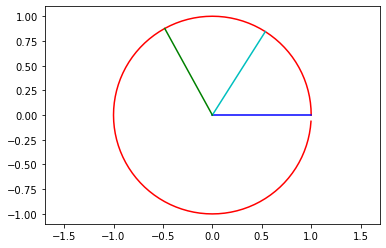

In [26]:
plt_graph(b, v)

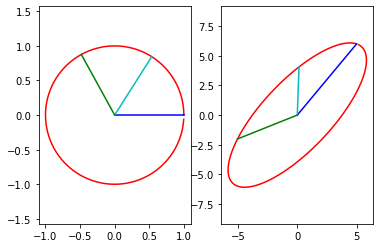

In [27]:
M = np.array([[5, -3],
              [6, 1]])

Mb = M@b
Mv = M@v

plt.subplot(1,2,1); plt_graph(b, v)
plt.subplot(1,2,2); plt_graph(Mb, Mv)

In [28]:
# do SVD

(U, S, Vt) = np.linalg.svd(M, full_matrices=False)
S = np.diag(S)

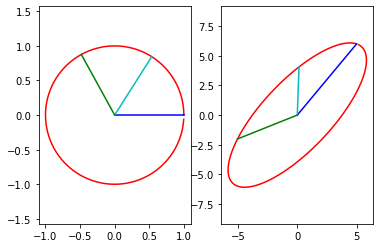

In [29]:
USVtb = U@S@Vt@b
USVtv = U@S@Vt@v

plt.subplot(1,2,1); plt_graph(b, v)
plt.subplot(1,2,2); plt_graph(USVtb, USVtv)

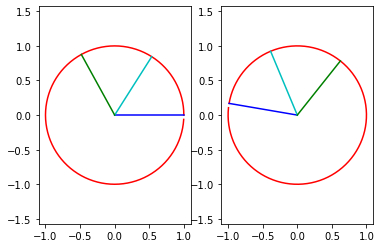

In [30]:
# USVtb = U@S@Vt@b
# USVtv = U@S@Vt@v

Vtb = Vt@b
Vtv = Vt@v

plt.subplot(1,2,1); plt_graph(b, v)
plt.subplot(1,2,2); plt_graph(Vtb, Vtv)

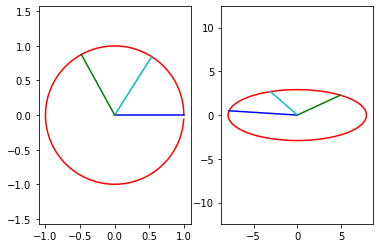

In [31]:
# USVtb = U@S@Vt@b
# USVtv = U@S@Vt@v

SVtb = S@Vtb
SVtv = S@Vtv

plt.subplot(1,2,1); plt_graph(b, v)
plt.subplot(1,2,2); plt_graph(SVtb, SVtv)

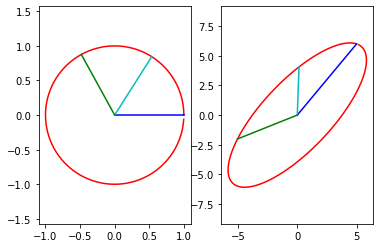

In [32]:
# USVtb = U@S@Vt@b
# USVtv = U@S@Vt@v

USVtb = U@SVtb
USVtv = U@SVtv

plt.subplot(1,2,1); plt_graph(b, v)
plt.subplot(1,2,2); plt_graph(USVtb, USVtv)

### for Homework 5

image dimensions :  (3024, 4032)
image size       :  12192768


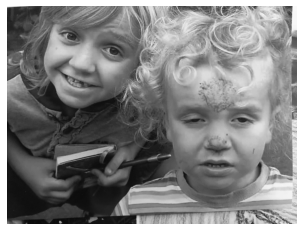

In [34]:
import numpy as np
import matplotlib.pyplot as plt

X = plt.imread('BoysBW.jpeg')[:,:,0]

print('image dimensions : ', X.shape)
print('image size       : ', X.size)

plt.imshow(X, cmap='gray'); plt.axis('off');